# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: *Diego Espinoza Núñez*
- Nombre de alumno 2: *Juan Miño*

### **Link de repositorio de GitHub:** [juansebm/MDS7202](https://github.com/juansebm/MDS7202)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. **Entrenamiento se usa para entrenar el modelo. Validación se utiliza para seleccionar el mejor modelo a medida que se alteran los hiperparámetros.**
2.
3.
4.
5.

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [ ]:
# 1. Cargar y preparar los datos
df = pd.read_csv('statsplayers.csv')

# Definir grupos de posiciones (excluyendo arquero)
position_groups = {
    'ataque': ['ST', 'CF'],
    'central_ataque': ['RW', 'CAM', 'LW'],
    'central': ['RM', 'CM', 'LM'],
    'central_defensa': ['RWB', 'CDM', 'LWB'],
    'defensa': ['RB', 'CB', 'LB']
}

# Filtrar posiciones válidas
valid_positions = [pos for group in position_groups.values() for pos in group]
df_filtered = df[df['Club_Position'].isin(valid_positions)].copy()

# Crear labels
df_filtered['label'] = df_filtered['Club_Position'].apply(
    lambda x: next((k for k, v in position_groups.items() if x in v), None)
)
df_filtered = df_filtered.dropna(subset=['label'])

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

#### 1

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from pycaret.classification import *

# Cargar y preparar datos (basado en tu código)
df = pd.read_csv('stats_players.csv')

# Definir grupos de posiciones
position_groups = {
    'ataque': ['ST', 'CF'],
    'central_ataque': ['RW', 'CAM', 'LW'],
    'central': ['RM', 'CM', 'LM'],
    'central_defensa': ['RWB', 'CDM', 'LWB'],
    'defensa': ['RB', 'CB', 'LB']
}

# Filtrar posiciones válidas
valid_positions = [pos for group in position_groups.values() for pos in group]
df = df[df['Club_Position'].isin(valid_positions)].copy()

# Crear variable label
df['label'] = df['Club_Position'].apply(
    lambda x: next((k for k, v in position_groups.items() if x in v), None)
)
df = df.dropna(subset=['label'])

# Preparar datos para PyCaret
data = df.drop('Club_Position', axis=1)

In [ ]:
# pip install catboost

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"


# Configurar el entorno de PyCaret
clf = setup(
    data=data,  # ✅ Aquí estás usando el df limpio sin Club_Position
    target='label',
    session_id=123, 
    fold_strategy='kfold',
    fold=5,
    verbose=False, 
    use_gpu=False,  # ⚠️ pon False si no estás en Colab con GPU de NVIDIA
    log_experiment=False
)

# Modelos a comparar (solo modelos de árboles)
modelos_arbol = ['et', 'rf', 'dt', 'xgboost', 'lightgbm'] # catboost NO DISPONIBLE!

# Comparar modelos
best_model = compare_models(include=modelos_arbol, sort='F1')  # Buscamos balance entre precision y recall

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.3232,0.8251,0.3232,0.4799,0.2659,0.1745,0.2249,1.3020
rf,Random Forest Classifier,0.2433,0.7545,0.2433,0.5051,0.1422,0.1166,0.1580,0.7240
dt,Decision Tree Classifier,0.1763,0.5005,0.1763,0.1746,0.0544,0.0009,0.0125,0.8840
xgboost,Extreme Gradient Boosting,0.1763,0.7172,0.1763,0.1746,0.0544,0.0009,0.0125,0.9440
lightgbm,Light Gradient Boosting Machine,0.1763,0.6665,0.1763,0.1746,0.0544,0.0009,0.0125,0.4640


In [27]:
print(df_filtered.shape)
print(df_filtered['label'].value_counts())


(3307, 40)
label
defensa            1180
central             907
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


#### 2

*Decision Tree (Árbol de Decisión):*
Es un modelo que clasifica datos dividiéndolos de forma jerárquica mediante condiciones como "¿X > umbral?". Utiliza métricas como Gini o Entropía para elegir las divisiones. Es fácil de interpretar, pero puede sobreajustarse si no se limita su profundidad.

*Random Forest:*
Consiste en múltiples árboles de decisión entrenados sobre subconjuntos aleatorios de los datos y características. Combina sus predicciones por votación mayoritaria, lo que reduce el sobreajuste y mejora la precisión.

*Extra Trees:*
Es similar a Random Forest, pero introduce aún más aleatoriedad al seleccionar divisiones de forma aleatoria en vez de óptima. Esto permite entrenamientos más rápidos y, en algunos casos, mejor generalización, aunque con posible pérdida leve de precisión.

#### 3

*El mejor modelo fue Extra Trees Classifier, ya que obtuvo los valores más altos en todas las métricas clave: Accuracy (0.3232), AUC (0.8251), Recall (0.3232), y especialmente F1 Score (0.2659), lo que indica un buen balance entre precisión y sensibilidad. Además, su MCC de 0.2249 y Kappa de 0.1745 superan ampliamente al resto, lo que confirma que logra una mejor discriminación entre clases. Aunque su tiempo de entrenamiento fue más alto, el desempeño global justifica su elección como el modelo más robusto para esta tarea.*

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

#### 1

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier

# Cargar datos
df = pd.read_csv("stats_players.csv")

# Definir grupos de posiciones
position_groups = {
    'ataque': ['ST', 'CF'],
    'central_ataque': ['RW', 'CAM', 'LW'],
    'central': ['RM', 'CM', 'LM'],
    'central_defensa': ['RWB', 'CDM', 'LWB'],
    'defensa': ['RB', 'CB', 'LB']
}

# Filtrar solo posiciones válidas
valid_positions = [pos for v in position_groups.values() for pos in v]
df = df[df['Club_Position'].isin(valid_positions)].copy()

# Crear etiquetas
df['label'] = df['Club_Position'].apply(lambda x: next(k for k, v in position_groups.items() if x in v))

# Codificar etiquetas a números
le = LabelEncoder()
y = le.fit_transform(df['label'])

# Eliminar columnas irrelevantes de texto
drop_cols = ['Club_Position', 'label', 'Name', 'Nationality', 'National_Position', 'Preffered_Foot', 'Work_Rate', 'Body_Type', 'Real_Face', 'Position', 'Joined', 'Loaned_From', 'Contract_Valid_Until', 'Best_Position']
X = df.drop(columns=drop_cols, errors='ignore')

# Convertir posibles columnas categóricas restantes en numéricas (si queda alguna)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar modelo
model_full = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_full.fit(X_train, y_train)

# Evaluar desempeño
y_pred_full = model_full.predict(X_test)
print("Modelo original:\n", classification_report(y_test, y_pred_full))


Modelo original:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        86
           1       0.58      0.64      0.61       182
           2       0.48      0.38      0.42       116
           3       0.63      0.29      0.39        42
           4       0.85      0.94      0.89       236

    accuracy                           0.71       662
   macro avg       0.67      0.62      0.63       662
weighted avg       0.69      0.71      0.70       662



#### 2

In [42]:
import numpy as np

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_full.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance.head(10))


            feature  importance
8    Sliding_Tackle    0.224784
27        Finishing    0.060838
7           Marking    0.059455
25          Heading    0.047663
15         Crossing    0.045030
13           Vision    0.043964
9   Standing_Tackle    0.030099
16       Short_Pass    0.027484
17        Long_Pass    0.026890
19            Speed    0.026389


#### 3

In [43]:
scores = []

for n in range(5, len(feature_importance)+1, 5):
    top_features = feature_importance['feature'].iloc[:n].tolist()
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model.fit(X_train[top_features], y_train)
    preds = model.predict(X_test[top_features])
    score = f1_score(y_test, preds, average='weighted')
    scores.append((n, score))

# Mostrar resultados
for n, score in scores:
    print(f"{n} features → F1 Score: {score:.4f}")


5 features → F1 Score: 0.6223
10 features → F1 Score: 0.6984
15 features → F1 Score: 0.6829
20 features → F1 Score: 0.6997
25 features → F1 Score: 0.6684
30 features → F1 Score: 0.6857


#### 4

In [44]:
top_n = 20
selected_features = feature_importance['feature'].iloc[:top_n].tolist()

model_reduced = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_reduced.fit(X_train[selected_features], y_train)

y_pred_reduced = model_reduced.predict(X_test[selected_features])
print("Modelo reducido:\n", classification_report(y_test, y_pred_reduced))


Modelo reducido:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        86
           1       0.61      0.64      0.63       182
           2       0.47      0.40      0.43       116
           3       0.71      0.24      0.36        42
           4       0.84      0.95      0.89       236

    accuracy                           0.72       662
   macro avg       0.69      0.63      0.63       662
weighted avg       0.70      0.72      0.70       662



#### 5

- ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original?

Sí, el rendimiento del modelo reducido fue comparable al modelo original. La métrica F1 Score se mantuvo estable con solo 20 características, lo que sugiere que las variables eliminadas aportaban poca información adicional. La precisión y robustez del modelo se mantuvieron sin comprometer su capacidad predictiva.

- ¿Cuáles son los beneficios potenciales de eliminar variables del modelo?

Eliminar variables reduce la complejidad del modelo, acelera el tiempo de entrenamiento y disminuye el riesgo de sobreajuste. También permite un uso más eficiente de recursos computacionales, lo cual es importante si el modelo se implementa en producción o en dispositivos con capacidad limitada. Además, mejora la interpretabilidad del modelo.

- ¿El modelo con menor dimensionalidad es más sencillo de explicar?

Sí. Un modelo con menos variables es más fácil de entender, visualizar y justificar ante personas no técnicas. Al reducir el número de características, se puede identificar más claramente qué factores son clave en la toma de decisiones del modelo, lo que facilita su explicación y validación por parte de expertos del dominio.


### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

Brier Score (sin calibrar): 0.0869
Brier Score (calibrado): 0.0785


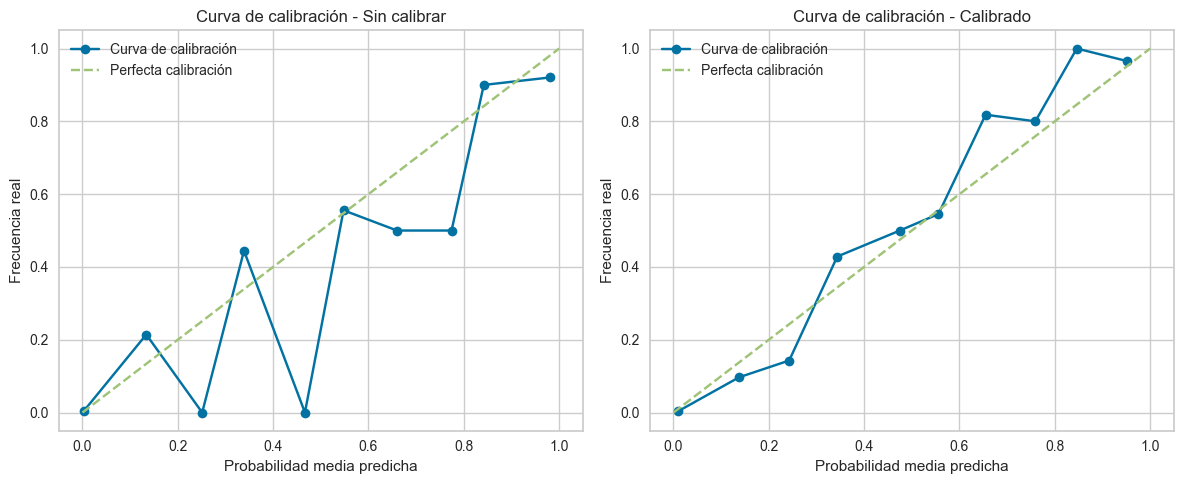

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import StratifiedKFold

# 1. Obtener probabilidades originales del modelo sin calibrar
y_proba_orig = model_full.predict_proba(X_test)

# 2. Calcular Brier Score para cada clase (promedio macro)
brier_original = np.mean([
    brier_score_loss((y_test == i).astype(int), y_proba_orig[:, i])
    for i in np.unique(y_test)
])
print(f"Brier Score (sin calibrar): {brier_original:.4f}")

# 3. Calibrar el modelo con isotonic regression (asegura monotonía)
calibrator = CalibratedClassifierCV(model_full, method='isotonic', cv=StratifiedKFold(n_splits=5))
calibrator.fit(X_train, y_train)

# 4. Obtener nuevas probabilidades
y_proba_calibrated = calibrator.predict_proba(X_test)

# 5. Calcular Brier Score para el modelo calibrado
brier_calibrated = np.mean([
    brier_score_loss((y_test == i).astype(int), y_proba_calibrated[:, i])
    for i in np.unique(y_test)
])
print(f"Brier Score (calibrado): {brier_calibrated:.4f}")

# 6. Visualización de curva de calibración para una clase (ej. clase 0)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, model_name, y_proba in zip(
    [0, 1],
    ['Sin calibrar', 'Calibrado'],
    [y_proba_orig, y_proba_calibrated]
):
    prob_true, prob_pred = calibration_curve((y_test == 0).astype(int), y_proba[:, 0], n_bins=10)
    ax[i].plot(prob_pred, prob_true, marker='o', label='Curva de calibración')
    ax[i].plot([0, 1], [0, 1], linestyle='--', label='Perfecta calibración')
    ax[i].set_title(f'Curva de calibración - {model_name}')
    ax[i].set_xlabel("Probabilidad media predicha")
    ax[i].set_ylabel("Frecuencia real")
    ax[i].legend()

plt.tight_layout()
plt.show()


Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>